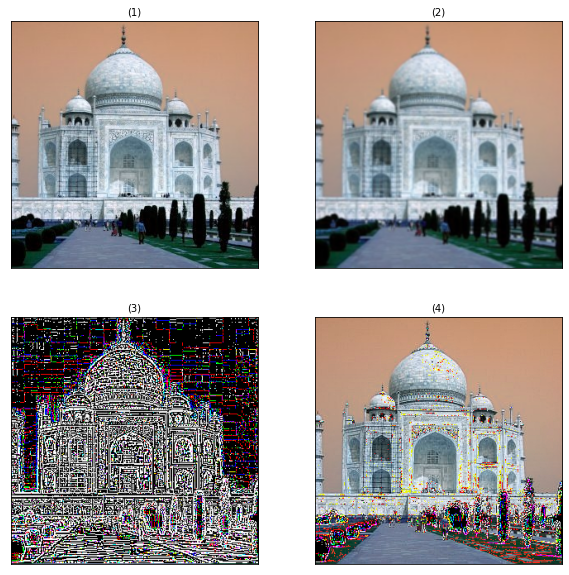

In [9]:
import cv2
%matplotlib inline
from IPython.display import display, Math, Latex
from skimage import data, feature, color, img_as_float, filters
import urllib
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO


url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert('L')

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
 
class imageSizeError(Exception):
    def __init__(self):
        self.value = "Image size error"
    def __str__(self):
        return self.value
 
 #Matrix subtraction
def decreaseArray(image1, image2):
    if image1.shape == image2.shape:
        image = image1.copy()
        for i in range(image1.shape[0]-1):
            for j in range(image1.shape[1]-1):
                image[i][j] = image1[i][j] - image2[i][j]
                j = j+1
            i = i+1
        return image
    else:
        raise imageSizeError()
 
 #Matrix addition
def increaseArray(image1, image2):
    if image1.shape == image2.shape:
        image = image1.copy()
        for i in range(image1.shape[0]-1):
            for j in range(image1.shape[1]-1):
                image[i][j] = image1[i][j] + image2[i][j]
                j = j+1
            i = i+1
        return image
    else:
        raise imageSizeError()
 
 #Display function
def showImages(images):
    for i in range(len(images)):
        img = images[i]
        title = "("+str(i+1)+")"
                 #Row, column, index
        plt.subplot(2, 2, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(title,fontsize=10)
        plt.xticks([])
        plt.yticks([])
    plt.show()
 
if __name__ == "__main__":
    #image = cv2.imread("image.jpg")
    req = urllib.request.urlopen('https://docs.gimp.org/2.8/en/images/filters/examples/taj_orig.jpg')
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(arr, -1) # 'Load it as it is'

    imageAver3 = cv2.blur(image, (3, 3))
    unsharpMask = decreaseArray(image, imageAver3)
    imageSharp = increaseArray(image, unsharpMask)
    images = [image, imageAver3, unsharpMask, imageSharp]
    showImages(images)